In [1]:
# Three observations based on data plot.
# 1. New York Times seems to have the worst compound sentiment out of all tweet sources every time I run the script.
# 2. Just the same, foxnews appears to have the best compound sentiment out of all tweet sources every time I run the script.
# 3. The average compound score differs greatly from the compound score of each tweet, as indicated by the great number of black
# dots corresponding to New York Times tweets that are centered at the zero line on the "per tweet" chart.

In [2]:
 # Dependencies
import tweepy
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
from config import consumer_key, consumer_secret, access_token, access_secret

In [3]:
 # Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
 # Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_secret

In [5]:
 # Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
 # Target Search Term
target_term = ["@CNNbrk","@BBCBreaking", "@CBSNews","@foxnews","@nytimes"]

In [7]:
 # Lists to hold sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter=[]
tweet_source = []
text_list = []
created_list = []

In [8]:
# Grab 100 tweets
for x in range(0,len(target_term)):
    public_tweets = api.search(target_term[x], count=100, result_type="recent")
    y=1

# Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        text = tweet['text']
        created = tweet['created_at']
        
    # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweet_source.append(target_term[x])
        text_list.append(text)
        created_list.append(created)
        counter.append(y)
        y= y + 1

In [9]:
#create dataframe from above lists
news_dataframe = pd.DataFrame({"compound":compound_list,"positive":positive_list,"negative":negative_list,"neutral":neutral_list,"counter":counter, "tweet source":tweet_source, 'text':text_list, "created_at":created_list})

cols = ['tweet source','counter','compound','negative','neutral','positive','text','created_at']
news_dataframe = news_dataframe[cols]
news_dataframe.to_csv('news_dataframe', sep='\t')
news_dataframe.head(1)

,tweet source,counter,compound,negative,neutral,positive,text,created_at
0,@CNNbrk,1,0.0,0.0,1.0,0.0,https://t.co/Jl1GWHC0ct @eBay @youtube @Facebo...,Thu Apr 26 23:25:05 +0000 2018


In [10]:
# Store the Average Sentiment by tweet source
sentiment = news_dataframe.groupby(['tweet source'])
sentiment = sentiment.mean()['compound']
sentiment = pd.DataFrame(sentiment)
sentiment

,compound
tweet source,
@BBCBreaking,-0.065002
@CBSNews,-0.111275
@CNNbrk,-0.075938
@foxnews,-0.040160
@nytimes,-0.175510


In [11]:
#establish variables for scatter plot for each tweet source. x is counts, y is compound sentiments
cnn = news_dataframe.loc[news_dataframe['tweet source'] == '@CNNbrk']
x_cnn = cnn['counter']
y_cnn = cnn['compound']

bbc = news_dataframe.loc[news_dataframe['tweet source'] == '@BBCBreaking']
x_bbc = bbc['counter']
y_bbc = bbc['compound']

cbs = news_dataframe.loc[news_dataframe['tweet source'] == '@CBSNews']
x_cbs = cbs['counter']
y_cbs = cbs['compound']

fox = news_dataframe.loc[news_dataframe['tweet source'] == '@foxnews']
x_fox = fox['counter']
y_fox = fox['compound']

nyt = news_dataframe.loc[news_dataframe['tweet source'] == '@nytimes']
x_nyt = nyt['counter']
y_nyt = nyt['compound']

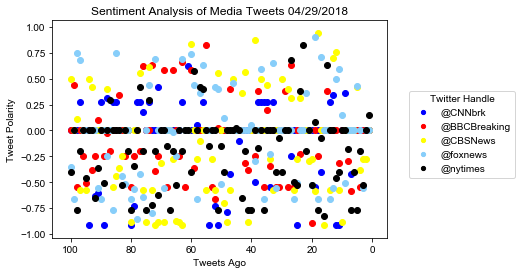

In [12]:
#create scatter plots, save as png
fig, ax = plt.subplots()

ax.scatter(x_cnn, y_cnn, color = 'b')
ax.plot([],[],'o',color = 'b')

ax.scatter(x_bbc, y_bbc, color = 'r')
ax.plot([],[],'o',color = 'r')

ax.scatter(x_cbs, y_cbs, color = 'yellow')
ax.plot([],[],'o',color = 'yellow')

ax.scatter(x_fox, y_fox, color = 'lightskyblue')
ax.plot([],[],'o',color = 'lightskyblue')

ax.scatter(x_nyt, y_nyt, color = 'black')
ax.plot([],[],'o',color = 'black')


plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets 04/29/2018')

ax.legend(['@CNNbrk','@BBCBreaking','@CBSNews','@foxnews','@nytimes'],markerscale=0.7, scatterpoints=1, fontsize=10,bbox_to_anchor=(1.05, 0.7),title='Twitter Handle')

plt.gca().invert_xaxis()
srn.set(style='darkgrid')
plt.savefig('sentiment_analysis.png', bbox_inches='tight')
plt.show()

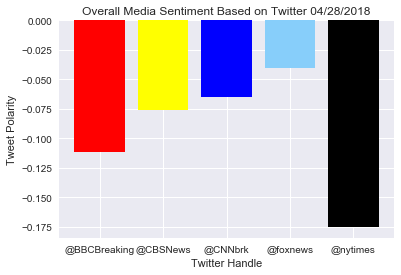

In [13]:
#display bar chart showing average compound sentiment by tweet source, save to png
plt.title("Overall Media Sentiment Based on Twitter 04/28/2018")
plt.xlabel("Twitter Handle")
plt.ylabel("Tweet Polarity")

plt.bar(target_term,sentiment['compound'], color=['b','r','yellow','lightskyblue','black'])
plt.savefig('overall_sentiment.png', bbox_inches = 'tight')
plt.show()